## Case_Study #05 , ANOVA
### Sreelekshmy S L
### NDSA_B4

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

#### Read the data set

In [2]:
sales = pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
sales.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


#### Check for null values

In [4]:
sales.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

#### No null values found

### Display the histograms showing the distribution of sales in each zone.

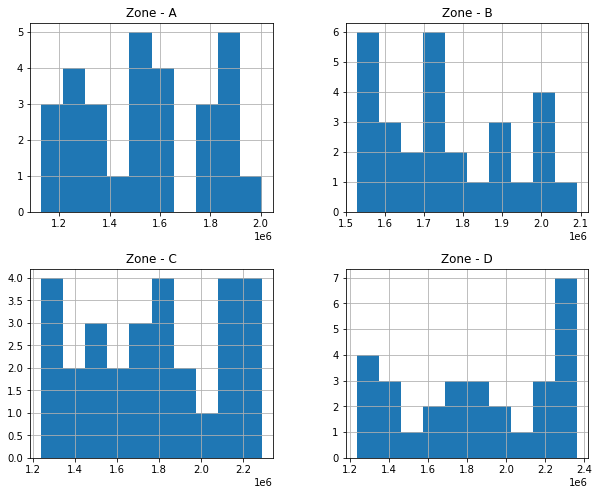

In [5]:
sales.drop('Month',axis=1).hist(figsize=(10,8))
plt.show()

## Q1. The mean sales generated by each zone.

#### Calculating the mean sales for  each zone

In [6]:
mean_sales=pd.DataFrame(np.round(sales.drop('Month',axis=1).mean()),columns=['Mean'])
mean_sales

,Mean
Zone - A,1540493.0
Zone - B,1755560.0
Zone - C,1772871.0
Zone - D,1842927.0


#### Plotting the mean values in a barplot.

<AxesSubplot:ylabel='Mean'>

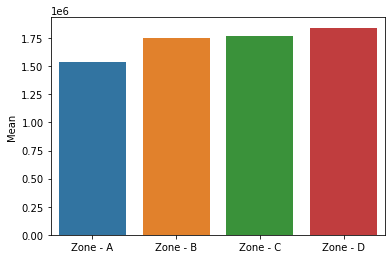

In [7]:
sns.barplot(data=mean_sales,x=mean_sales.index,y=mean_sales['Mean'])

#### The highest average sales is found in Zone-D with a value of 1842927
#### The lowest average sales is found in Zone-A with a value of 1540493
#### Zone B and C have an almost same average sales which lies in between of zone-A and zone-D.
 


## Q2. Total sales generated by all the zones for each month.


#### Calculating the total sales by month

In [15]:
import warnings 
warnings.filterwarnings('ignore')
month_sales=pd.DataFrame(np.array(sales.sum(axis=1)),sales['Month'],columns=['Total'])

month_sales

,Total
Month,
Month - 1,7022544
Month - 2,7152303
Month - 3,6475939
Month - 4,8174449
Month - 5,5995328
Month - 6,7151387
Month - 7,7287108
Month - 8,7816299
Month - 9,6703395


### Plotting a line graph for total sales per month

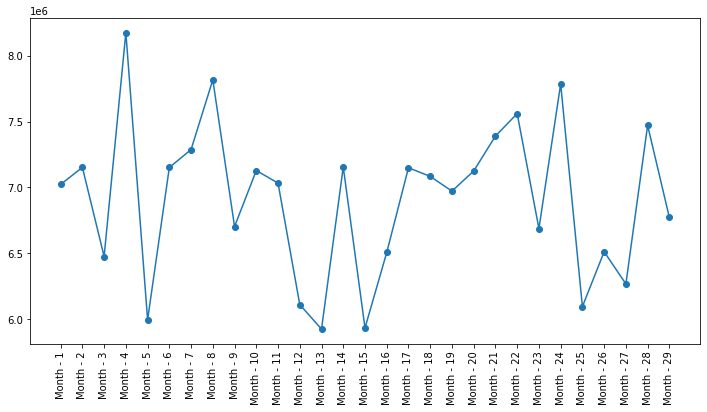

In [9]:
x=month_sales.index
y=month_sales['Total']
plt.figure(figsize=(12,6))
plt.plot(x,y,marker='o')
plt.xticks(rotation=90);

### Printing the maximum and minimum total sales and corresponding months

In [10]:
print('The highest value of total sales is ',month_sales['Total'].max(),' and it occured in ',month_sales['Total'].idxmax())

The highest value of total sales is  8174449  and it occured in  Month - 4


In [11]:
print('The lowest value of total sales is ',month_sales['Total'].min(),' and it occured in ',month_sales['Total'].idxmin())

The lowest value of total sales is  5925424  and it occured in  Month - 13


#### Hence Month-4 generates the highest total sales of about 8174449 among all and Month-13 generates the lowest of about 5925424 
#### And the graph shows that the sales are not steadily increasing or decreasing over the months, it has multiple peaks and troughs

## Q3.  Check whether all the zones generate the same amount of sales.

### H_0: The average sales generated by all the four zones are same
### H_a : The average sales generated by all the four zones are not the same

Seperating out the categories to test.

In [12]:
zone_A = sales['Zone - A']
zone_B = sales['Zone - B']
zone_C = sales['Zone - C']
zone_D = sales['Zone - D']

#### Here we use one-way ANOVA to test the given hypothesis, since we have four categories and a single variable to compare.
#### For this we calculate the f-statistics and p-value using f_oneway() 

In [13]:
F_stat,p=stat.f_oneway(zone_A,zone_B,zone_C,zone_D)
print('F-statistics : ',F_stat)

F-statistics :  5.672056106843581


In [14]:
print('p_value : ',p)

p_value :  0.0011827601694503335


### Here the p-value < 0.05 , the significance level
### Hence we reject the null hypothesis.
### Therefore we conclude that there is significant difference in the average sales generated by each zones
### i.e, the four zones does not generate same amount of sales.

### End